In [ ]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


# CrimeCast: Forecasting Crime Categories

# *1. Imported Required Libraries*

In [2]:
import numpy as np
from numpy import nan
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import learning_curve

from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score

from sklearn.dummy import DummyClassifier

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.neural_network import MLPClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.utils.multiclass import type_of_target

In [3]:
# Seed will ensure that the sequence of random numbers generated by NumPy will be the same each time when we run the code.

np.random.seed(306)

In [4]:
# ShuffleSplit is a type of cross-validation technique, where the data is splitted in k folds, each split is created
# by shuffling the data and then splitting it.

# cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=42)

In [5]:
import warnings
warnings.filterwarnings("ignore")

# 2. *EDA*

## a) Loading the dataset

In [6]:
data=pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
test_data=pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")

In [7]:
pd.set_option("display.max_columns",data.shape[1])

## Inspecting the Data

In [8]:
data.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,1.0,0385,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,2.0,0329 1202,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,1.0,0329 1300,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [9]:
test_data.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,2.0,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,1.0,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,2.0,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,1.0,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,2.0,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


## Shape of training data

In [10]:
data.shape

(20000, 22)

In [11]:
test_data.shape

(5000, 21)

## Details of features

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               5000 non-null   object 
 1   Cross_Street           810 non-null    object 
 2   Latitude               5000 non-null   float64
 3   Longitude              5000 non-null   float64
 4   Date_Reported          5000 non-null   object 
 5   Date_Occurred          5000 non-null   object 
 6   Time_Occurred          5000 non-null   float64
 7   Area_ID                5000 non-null   float64
 8   Area_Name              5000 non-null   object 
 9   Reporting_District_no  5000 non-null   float64
 10  Part 1-2               5000 non-null   float64
 11  Modus_Operandi         4316 non-null   object 
 12  Victim_Age             5000 non-null   float64
 13  Victim_Sex             4357 non-null   object 
 14  Victim_Descent         4357 non-null   object 
 15  Prem

## b) Summary Statistics

In [14]:
data.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [15]:
data.describe(include=object)

,Location,Cross_Street,Date_Reported,Date_Occurred,Area_Name,Modus_Operandi,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status,Status_Description,Crime_Category
count,20000,3448,20000,20000,20000,17259,17376,17376,19995,7335,20000,20000,20000
unique,12399,1495,811,366,21,10489,4,17,216,57,5,5,6
top,6TH,BROADWAY,07/13/2020 12:00:00 AM,01/01/2020 12:00:00 AM,77th Street,0344,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
freq,33,56,87,137,1345,826,8538,6143,5033,3990,15236,15236,11666


In [16]:
test_data.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,1847.000000
mean,33.957169,-117.952663,1337.737400,10.736600,1119.879800,1.414000,30.592000,300.858800,364.014077
std,1.986742,6.890957,663.922202,6.051524,605.143645,0.492598,21.897905,212.253742,119.489932
min,0.000000,-118.650300,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.010800,-118.431200,900.000000,6.000000,628.000000,1.000000,14.000000,101.000000,309.000000
50%,34.058000,-118.323200,1430.000000,11.000000,1138.000000,1.000000,31.000000,203.000000,400.000000
75%,34.162250,-118.274600,1900.000000,16.000000,1622.250000,2.000000,46.000000,501.000000,400.000000
max,34.327500,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,957.000000,516.000000


In [17]:
test_data.describe(include='object')

,Location,Cross_Street,Date_Reported,Date_Occurred,Area_Name,Modus_Operandi,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status,Status_Description
count,5000,810,5000,5000,5000,4316,4357,4357,4999,1847,5000,5000
unique,4165,547,514,366,21,2961,4,16,145,53,5,5
top,7TH ST,FIGUEROA ST,06/19/2020 12:00:00 AM,01/01/2020 12:00:00 AM,77th Street,0344,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
freq,10,12,31,27,301,199,2121,1536,1257,1003,3830,3830


## *Insights*
## *It helped in identifying high values (outliers) or missing data patterns.*
## *Numerical features have varying scales, so it need to be scaled.*

## c) Identify Missing Values

In [18]:
data.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [19]:
test_data.isnull().sum()

Location                    0
Cross_Street             4190
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Area_Name                   0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi            684
Victim_Age                  0
Victim_Sex                643
Victim_Descent            643
Premise_Code                0
Premise_Description         1
Weapon_Used_Code         3153
Weapon_Description       3153
Status                      0
Status_Description          0
dtype: int64

## *Insights*
## *Here some columns have missing values, which need to be addressed before modeling.*

## d) Visualize Data Distributions

## Name of the Numerical Features

In [20]:
num_features=data.select_dtypes(include=['float64', 'int64']).columns
print(num_features)

Index(['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code',
       'Weapon_Used_Code'],
      dtype='object')


## Plotted histograms for numerical features

In [21]:
data.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [22]:
data[data['Latitude']==0].shape[0]

78

Text(0.5, 1.0, 'Distribution of Latitude Values')

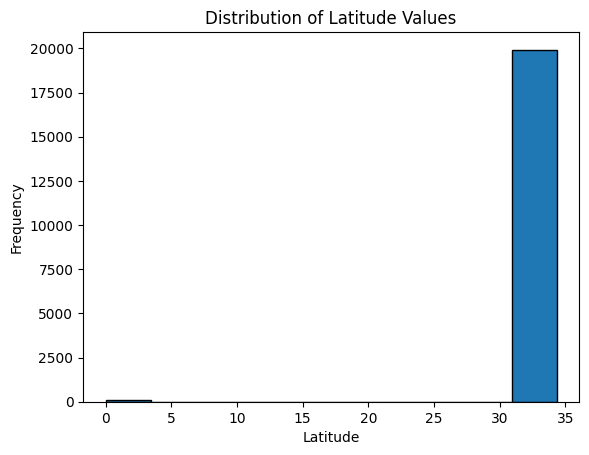

In [23]:
data['Latitude'].plot(kind='hist', bins=10, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Distribution of Latitude Values')

## *Insights*
## *The Latitude has a minimum value of 0.000000 and a maximum value of 34.328100 which means there is a potential outliers at the lower end.*

In [24]:
data[data['Longitude']==0].shape[0]

78

Text(0.5, 1.0, 'Distribution of Longitude Values')

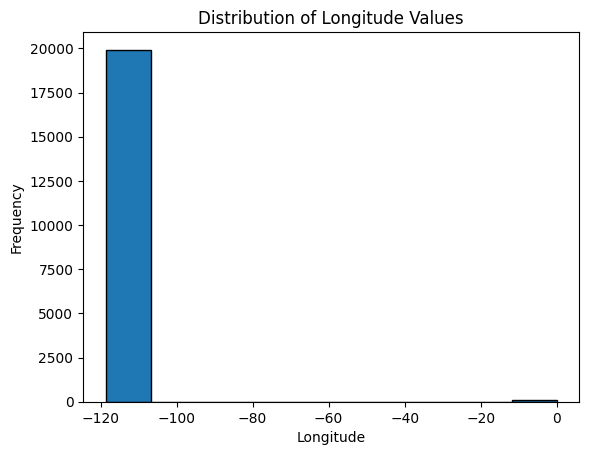

In [25]:
data['Longitude'].plot(kind='hist', bins=10, edgecolor='black')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.title('Distribution of Longitude Values')

## *Insights*
## *The Longitude also has a minimum value of -118.663400 and a maximum value of 0.000000, which is unusual for longitude values which indicates that outliers are present.*

Text(0.5, 1.0, 'Distribution of Time_Occurred Values')

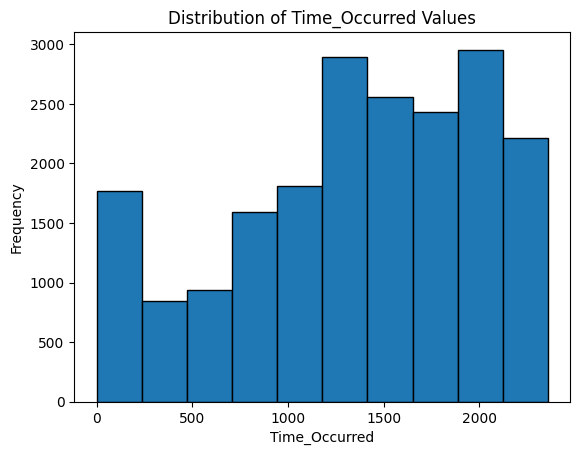

In [26]:
data['Time_Occurred'].plot(kind='hist', bins=10, edgecolor='black')
plt.xlabel('Time_Occurred')
plt.ylabel('Frequency')
plt.title('Distribution of Time_Occurred Values')

Text(0.5, 1.0, 'Distribution of Area_ID Values')

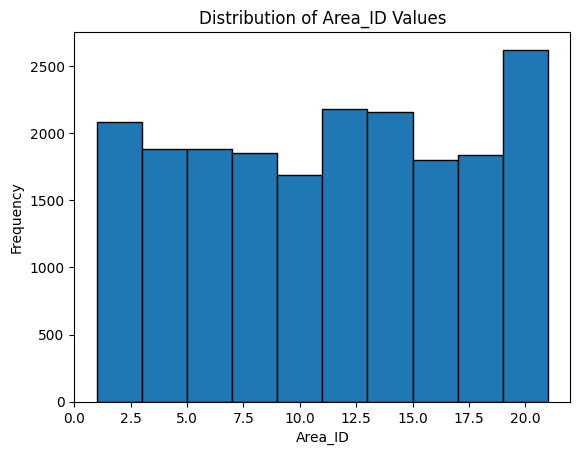

In [27]:
data['Area_ID'].plot(kind='hist', bins=10, edgecolor='black')
plt.xlabel('Area_ID')
plt.ylabel('Frequency')
plt.title('Distribution of Area_ID Values')

Text(0.5, 1.0, 'Distribution of Reporting_District_no Values')

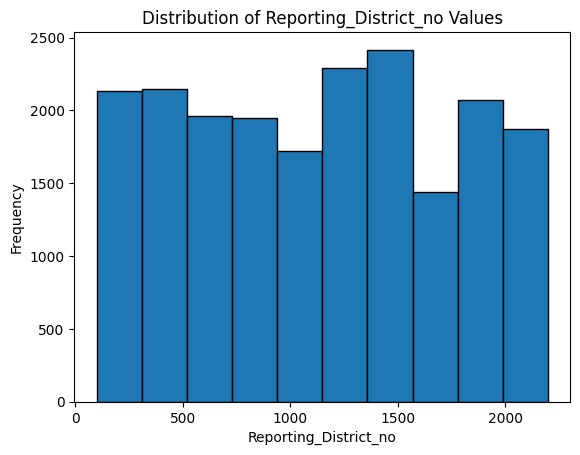

In [28]:
data['Reporting_District_no'].plot(kind='hist', bins=10, edgecolor='black')
plt.xlabel('Reporting_District_no')
plt.ylabel('Frequency')
plt.title('Distribution of Reporting_District_no Values')

Text(0.5, 1.0, 'Distribution of Part 1-2 Values')

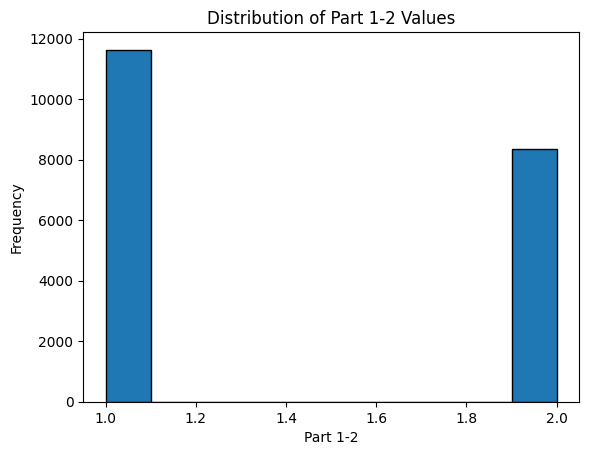

In [29]:
data['Part 1-2'].plot(kind='hist', bins=10, edgecolor='black')
plt.xlabel('Part 1-2')
plt.ylabel('Frequency')
plt.title('Distribution of Part 1-2 Values')

Text(0.5, 1.0, 'Distribution of Victim_Age Values')

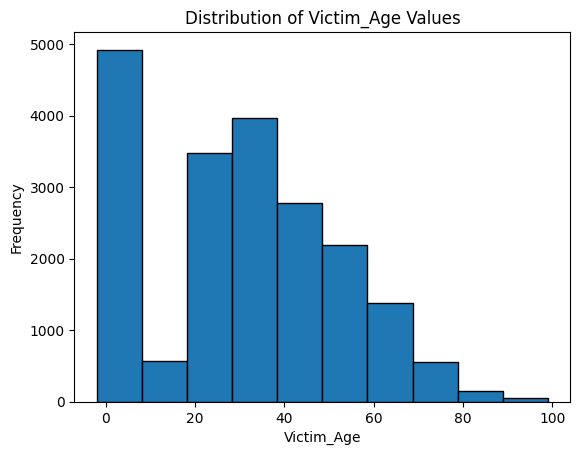

In [30]:
data['Victim_Age'].plot(kind='hist', bins=10, edgecolor='black')
plt.xlabel('Victim_Age')
plt.ylabel('Frequency')
plt.title('Distribution of Victim_Age Values')

## *Insights*
## *Victim_Age has values ranging from -2.0 to 99.0, which seems unrealistic because of the negative age.*

Text(0.5, 1.0, 'Distribution of Premise_Code Values')

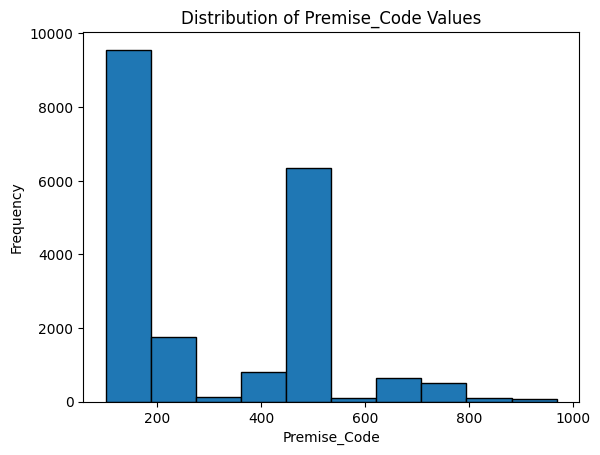

In [31]:
data['Premise_Code'].plot(kind='hist', bins=10, edgecolor='black')
plt.xlabel('Premise_Code')
plt.ylabel('Frequency')
plt.title('Distribution of Premise_Code Values')

Text(0.5, 1.0, 'Distribution of Weapon_Used_Code Values')

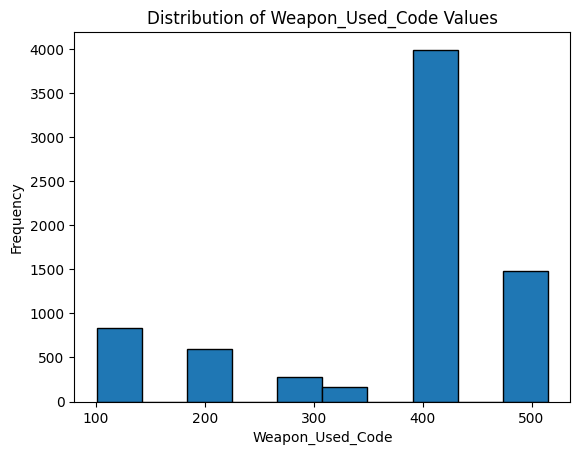

In [32]:
data['Weapon_Used_Code'].plot(kind='hist', bins=10, edgecolor='black')
plt.xlabel('Weapon_Used_Code')
plt.ylabel('Frequency')
plt.title('Distribution of Weapon_Used_Code Values')

## *Insights*
## *Visualized the distribution of numerical features.*
## *It Helped in understanding the range and frequency of data points for each numerical feature.*
## *Helped in understanding the data's shape, identifying outliers, comparing distributions.*
## *It provides a clear visual representation, also facilitate better data analysis and decision making.*

## e) Outlier Detection

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Latitude'),
  Text(2, 0, 'Longitude'),
  Text(3, 0, 'Time_Occurred'),
  Text(4, 0, 'Area_ID'),
  Text(5, 0, 'Reporting_District_no'),
  Text(6, 0, 'Part 1-2'),
  Text(7, 0, 'Victim_Age'),
  Text(8, 0, 'Premise_Code'),
  Text(9, 0, 'Weapon_Used_Code')])

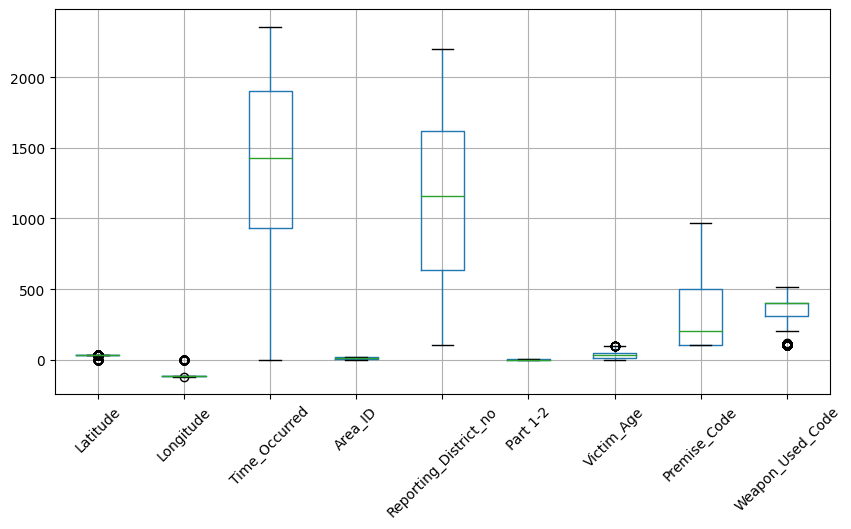

In [33]:
# Plot box plot for numerical features to detect outliers

plt.figure(figsize=(10, 5))
data.boxplot()
plt.xticks(rotation=45)

## *Insights*

## *The box represents the IQR.*
## *The line inside the box represents the median.*
## *Any points outside the whiskers would be considered outliers and plotted individually.*
## *This visualization helps in quickly assessing the distribution characteristics and comparing different features in the dataset.*
## *Outliers can impact model performance, so it need to be handled appropriately.*

## *The Latitude has a minimum value of 0.000000 and a maximum value of 34.328100 which means there is a potential outliers at the lower end.*
## *The Longitude also has a minimum value of -118.663400 and a maximum value of 0.000000, which is unusual for longitude values which indicates that outliers are present.*
## *Victim_Age has values ranging from -2.0 to 99.0, which seems unrealistic because of the negative age.*

## Pairplot

In [34]:
# sns.pairplot(data=data,hue='Crime_Category')

## *Insights*
## *It is a visualization tool for exploring relationships between multiple features in a dataset. By displaying scatterplots of each pair of features and the distribution of individual features helps in identifying patterns, correlations, and potential outliers. The hue-based coloring allows more detailed analysis of how different categories in the data compare with each other.*

## Violinplot

<Axes: >

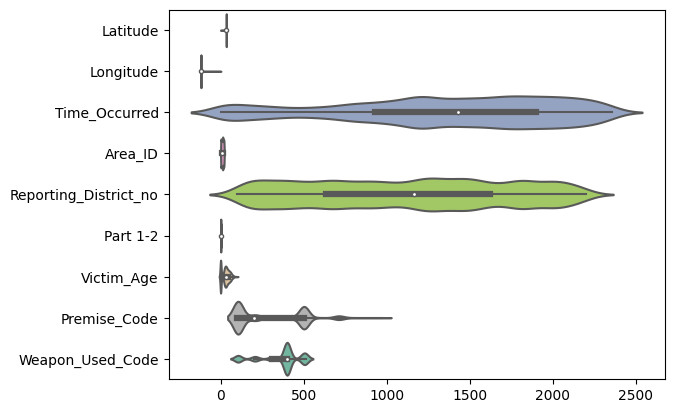

In [35]:
sns.violinplot(data=data, orient="h", palette="Set2",  scale="width")

## *Insights*
## *Violin plots are  useful for visualizing complex distributions of features and making comparisons across multiple groups or categories in a dataset.*

## f) Feature Relationships

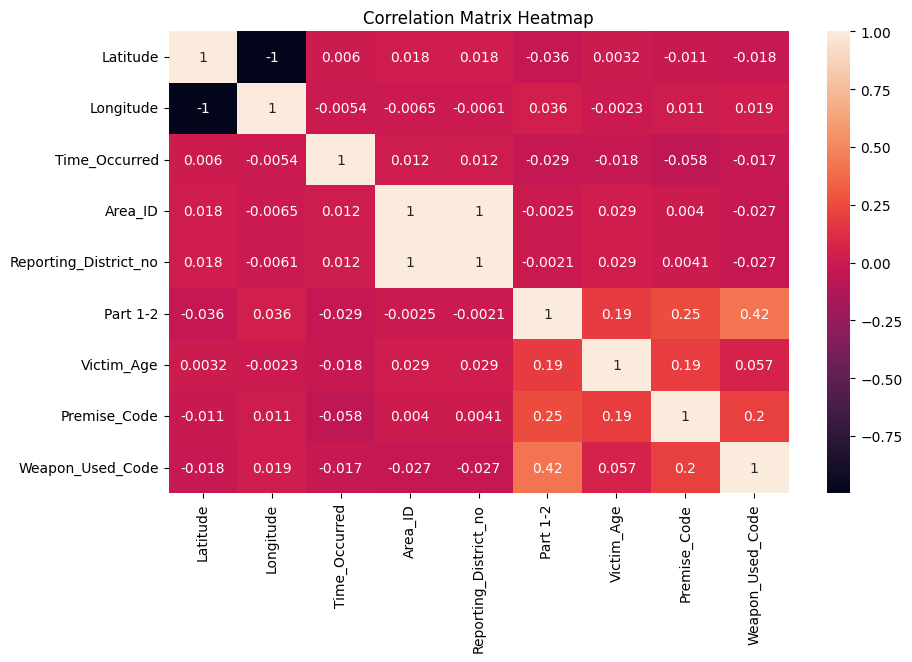

In [36]:
# Visualizing the correlation matrix for numerical features
# Correlation matrix and heatmap 

corr_mat = data[num_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

## *Insights*
## *It shows the pairwise correlation between numerical features.*
## *Also helped in understanding the relationship between numerical features and identifying redundant features.*
## *High correlation between certain features indicate multicollinearity, which can affect the stability and interpretability of models.*
## *From the pair of features which are highly correlated take only one feature.*
## *This type of visualization is essential during exploratory data analysis beacuse it makes easier to make informed decisions about statistical analyses or machine learning model development.*

## g) Categorical Features Analysis

## Name of the Categorical Features

In [37]:
cat_features = data.select_dtypes(include=['object']).columns
cat_features

Index(['Location', 'Cross_Street', 'Date_Reported', 'Date_Occurred',
       'Area_Name', 'Modus_Operandi', 'Victim_Sex', 'Victim_Descent',
       'Premise_Description', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category'],
      dtype='object')

In [38]:
# cat_features = data.select_dtypes(include=['object']).columns
# for column in cat_features:
#     plt.figure(figsize=(10, 5))
#     sns.countplot(y=column, data=data)
#     plt.show()

## *Insights*
## *Bar plots for categorical features to visualize the distribution of each category.*
## *By analyzing the frequency of each category, you can identify the most and least common categories. This helps in understanding the distribution of the categorical features.*
## *The mode of a categorical feature indicates the most common category, which can be an important insight, especially in understanding the dominant behavior in the data.*

## Unique Label names

In [39]:
data['Crime_Category'].unique()

array(['Property Crimes', 'Violent Crimes', 'Other Crimes',
       'Crimes against Public Order', 'Fraud and White-Collar Crimes',
       'Crimes against Persons'], dtype=object)

## Unique Label Counts

In [40]:
data['Crime_Category'].value_counts()

Crime_Category
Property Crimes                  11666
Violent Crimes                    4767
Crimes against Public Order       1808
Fraud and White-Collar Crimes     1355
Crimes against Persons             225
Other Crimes                       179
Name: count, dtype: int64

## Distribution of samples in each classes

Text(0, 0.5, 'Count')

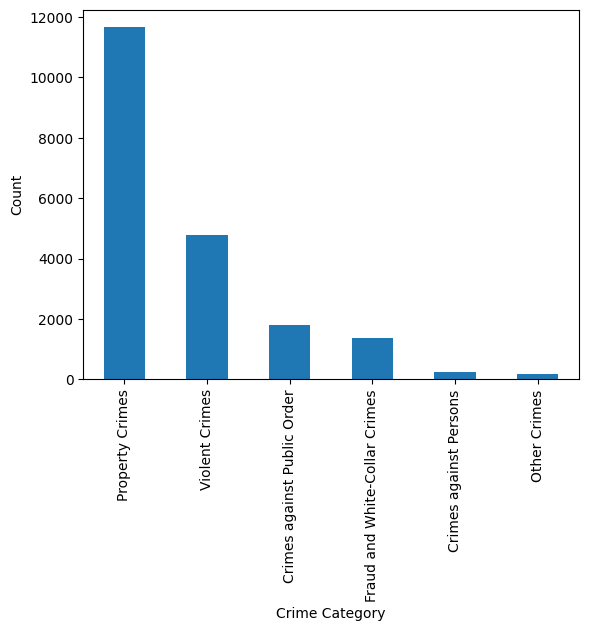

In [41]:
data['Crime_Category'].value_counts().plot(kind='bar')
plt.xlabel('Crime Category')
plt.ylabel('Count')
# plt.xticks(rotation=0)
# plt.figure(figsize=(20,5))
# plt.tight_layout()

## *Insights*
## *Property crimes are the most frequent, followed by violent crimes and other.*

# 3. *Data Preprocessing and Cleaning*

In [42]:
data.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,1.0,0385,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,2.0,0329 1202,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,1.0,0329 1300,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


## Checking for null values in training and test dataset

In [43]:
data.isna().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [44]:
test_data.isna().sum()

Location                    0
Cross_Street             4190
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Area_Name                   0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi            684
Victim_Age                  0
Victim_Sex                643
Victim_Descent            643
Premise_Code                0
Premise_Description         1
Weapon_Used_Code         3153
Weapon_Description       3153
Status                      0
Status_Description          0
dtype: int64

## Convert Date_Reported and Date_Occurred to datetime for training dataset

## Extract day, month and year from Date_Reported and Date_Occured from training dataset

## Extracting features such as day, month and year from Date_Reported and Date_Occurred provides additional dimensions for the analysis.

In [45]:
# Convert 'Date_Reported' and 'Date_Occurred' to datetime for training dataset

data['Date_Reported']=pd.to_datetime(data['Date_Reported'])
data['Date_Occurred']=pd.to_datetime(data['Date_Occurred'])

# Extracting additional features from 'Date_Reported' and 'Date_Occurred' like
# year, month, day, day of week and hour

data['Reported_Year']=data['Date_Reported'].dt.year
data['Reported_Month']=data['Date_Reported'].dt.month
data['Reported_Day']=data['Date_Reported'].dt.day


data['Occurred_Year']=data['Date_Occurred'].dt.year
data['Occurred_Month']=data['Date_Occurred'].dt.month
data['Occurred_Day']=data['Date_Occurred'].dt.day




## Extract day, month and year from Date_Reported and Date_Occured from test dataset

In [46]:
# Convert 'Date_Reported' and 'Date_Occurred' to datetime for test dataset

test_data['Date_Reported']=pd.to_datetime(test_data['Date_Reported'])
test_data['Date_Occurred']=pd.to_datetime(test_data['Date_Occurred'])

# Extracting additional features from 'Date_Reported' and 'Date_Occurred' like
# year, month, day, day of week and hour

test_data['Reported_Year']=test_data['Date_Reported'].dt.year
test_data['Reported_Month']=test_data['Date_Reported'].dt.month
test_data['Reported_Day']=test_data['Date_Reported'].dt.day


test_data['Occurred_Year']=test_data['Date_Occurred'].dt.year
test_data['Occurred_Month']=test_data['Date_Occurred'].dt.month
test_data['Occurred_Day']=test_data['Date_Occurred'].dt.day

## *Insights*
## *Extracting and creating new features from the existing ones gives additional information and helps in improving the model performance.*

In [47]:
print(data.shape)
print(test_data.shape)

(20000, 28)
(5000, 27)


## Delete Date_Reported and Date_Occured feature fron train and test dataset

In [48]:
data.drop(['Date_Reported', 'Date_Occurred'], axis=1, inplace=True)
test_data.drop(['Date_Reported', 'Date_Occurred'], axis=1, inplace=True)

In [49]:
print(data.shape)
print(test_data.shape)

(20000, 26)
(5000, 25)


## Remove Outliers

In [50]:
min_latitude = 33.0
max_latitude = 34.5
min_longitude = -119.0
max_longitude = -117.0

# Remove outliers in Latitude and Longitude
data = data[(data['Latitude'] >= min_latitude) & (data['Latitude'] <= max_latitude)] 
data = data[(data['Longitude'] >= min_longitude) & (data['Longitude'] <= max_longitude)]


# Remove unrealistic Victim_Age values
data = data[(data['Victim_Age'] >= 0) & (data['Victim_Age'] <= 100)]

## Detecting missing values and imputation for training dataset

## Filling missing values with placeholders like 'Unknown' or 'None' for categorical features and with median value for numerical features, to ensure that the models can handle the incomplete data without giving any error.

In [51]:
# Checking for nan values in training dataset

data.isnull().sum()

Location                     0
Cross_Street             16484
Latitude                     0
Longitude                    0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2740
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12605
Weapon_Description       12605
Status                       0
Status_Description           0
Crime_Category               0
Reported_Year                0
Reported_Month               0
Reported_Day                 0
Occurred_Year                0
Occurred_Month               0
Occurred_Day                 0
dtype: int64

In [52]:
# Filled NaN values for training dataset
# Filled NaN Values in categorical columns with placeholders
# Filled missing values in numerical columns with the median value


data['Cross_Street'].fillna('Unknown', inplace=True)
data['Modus_Operandi'].fillna('Unknown', inplace=True)
data['Victim_Sex'].fillna('Unknown', inplace=True)
data['Victim_Descent'].fillna('Unknown', inplace=True)
data['Premise_Description'].fillna('Unknown', inplace=True)
data['Weapon_Used_Code'].fillna(data['Weapon_Used_Code'].median(), inplace=True)
data['Weapon_Description'].fillna('None', inplace=True)

In [53]:
# Verifing for NaN values in training dataset

data.isnull().sum()

Location                 0
Cross_Street             0
Latitude                 0
Longitude                0
Time_Occurred            0
Area_ID                  0
Area_Name                0
Reporting_District_no    0
Part 1-2                 0
Modus_Operandi           0
Victim_Age               0
Victim_Sex               0
Victim_Descent           0
Premise_Code             0
Premise_Description      0
Weapon_Used_Code         0
Weapon_Description       0
Status                   0
Status_Description       0
Crime_Category           0
Reported_Year            0
Reported_Month           0
Reported_Day             0
Occurred_Year            0
Occurred_Month           0
Occurred_Day             0
dtype: int64

## Detecting missing values and imputation for test dataset

In [54]:
# Checking for nan values in test dataset

test_data.isnull().sum()

Location                    0
Cross_Street             4190
Latitude                    0
Longitude                   0
Time_Occurred               0
Area_ID                     0
Area_Name                   0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi            684
Victim_Age                  0
Victim_Sex                643
Victim_Descent            643
Premise_Code                0
Premise_Description         1
Weapon_Used_Code         3153
Weapon_Description       3153
Status                      0
Status_Description          0
Reported_Year               0
Reported_Month              0
Reported_Day                0
Occurred_Year               0
Occurred_Month              0
Occurred_Day                0
dtype: int64

In [55]:
# Filled NaN values for test dataset
# Filled NaN Values in categorical columns with placeholders
# Filled missing values in numerical columns with the median value


test_data['Cross_Street'].fillna('Unknown', inplace=True)
test_data['Modus_Operandi'].fillna('Unknown', inplace=True)
test_data['Victim_Sex'].fillna('Unknown', inplace=True)
test_data['Victim_Descent'].fillna('Unknown', inplace=True)
test_data['Premise_Description'].fillna('Unknown', inplace=True)
test_data['Weapon_Used_Code'].fillna(test_data['Weapon_Used_Code'].median(), inplace=True)
test_data['Weapon_Description'].fillna('None', inplace=True)

In [56]:
# Verifing for NaN values in test dataset

test_data.isnull().sum()

Location                 0
Cross_Street             0
Latitude                 0
Longitude                0
Time_Occurred            0
Area_ID                  0
Area_Name                0
Reporting_District_no    0
Part 1-2                 0
Modus_Operandi           0
Victim_Age               0
Victim_Sex               0
Victim_Descent           0
Premise_Code             0
Premise_Description      0
Weapon_Used_Code         0
Weapon_Description       0
Status                   0
Status_Description       0
Reported_Year            0
Reported_Month           0
Reported_Day             0
Occurred_Year            0
Occurred_Month           0
Occurred_Day             0
dtype: int64

In [57]:
data.shape

(19916, 26)

## *Insights*
## *Depending on the nature and proportion of missing values, considered imputation and removed some affected rows.*
## *Crime cannot happen with negative age people, so age of a person must be greater than or equal to zero.*

In [58]:
data.shape

(19916, 26)

In [59]:
test_data.shape

(5000, 25)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19916 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               19916 non-null  object 
 1   Cross_Street           19916 non-null  object 
 2   Latitude               19916 non-null  float64
 3   Longitude              19916 non-null  float64
 4   Time_Occurred          19916 non-null  float64
 5   Area_ID                19916 non-null  float64
 6   Area_Name              19916 non-null  object 
 7   Reporting_District_no  19916 non-null  float64
 8   Part 1-2               19916 non-null  float64
 9   Modus_Operandi         19916 non-null  object 
 10  Victim_Age             19916 non-null  float64
 11  Victim_Sex             19916 non-null  object 
 12  Victim_Descent         19916 non-null  object 
 13  Premise_Code           19916 non-null  float64
 14  Premise_Description    19916 non-null  object 
 15  Weapon_

## Numerical Features

In [61]:
numeric_features = data.select_dtypes(include=['float64', 'int32']).columns
numeric_features

Index(['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code',
       'Weapon_Used_Code', 'Reported_Year', 'Reported_Month', 'Reported_Day',
       'Occurred_Year', 'Occurred_Month', 'Occurred_Day'],
      dtype='object')

## Categorical Features

In [62]:
categorical_features = data.select_dtypes(exclude=['float64', 'int32']).columns
categorical_features

Index(['Location', 'Cross_Street', 'Area_Name', 'Modus_Operandi', 'Victim_Sex',
       'Victim_Descent', 'Premise_Description', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category'],
      dtype='object')

## Encoded the target variable Crime_Category using Label Encoder

In [63]:
# Encoded the target variable Crime_Category

label_encoder_crime=LabelEncoder()
data['Crime_Category']=label_encoder_crime.fit_transform(data['Crime_Category'])


## *Insights*
## *Label encoding is a preprocessing step that is used to convert categorical data (labels) into a numerical format that can be used by machine learning algorithms. This is important because many algorithms can only process numerical input.*


## Encoded the categorical features using Label Encoder

In [64]:
# Encoded the categorical features


cat_columns = ['Location','Cross_Street','Area_Name','Modus_Operandi',
                'Victim_Sex','Victim_Descent','Premise_Description',
                'Weapon_Description','Status','Status_Description']

label_encoder = {}
for col in cat_columns:
    lb_enco_cat = LabelEncoder()
    data[col] = lb_enco_cat.fit_transform(data[col])
    
    #store the label encoder
    label_encoder[col] = lb_enco_cat
    

    # handle unseen labels in test data
    test_data[col] = test_data[col].map(lambda x: '<unknown>' if x not in lb_enco_cat.classes_ else x)
    
    lb_enco_cat.classes_ = np.append(lb_enco_cat.classes_, '<unknown>')
    test_data[col] = lb_enco_cat.transform(test_data[col])

## Scaling the numerical features

## Scaling numerical features helps in balancing the importance of features and ensure that the models converges faster and performs better.

In [65]:
# Scaling the numerical features

scaler = StandardScaler()
num_columns = ['Latitude','Longitude','Time_Occurred','Area_ID',
               'Reporting_District_no','Part 1-2','Victim_Age',
               'Premise_Code','Weapon_Used_Code','Reported_Year',
               'Reported_Month','Reported_Day','Occurred_Year',
               'Occurred_Month','Occurred_Day']

data[num_columns] = scaler.fit_transform(data[num_columns])
test_data[num_columns] = scaler.transform(test_data[num_columns])

In [66]:
data.head()

,Location,Cross_Street,Latitude,Longitude,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,...,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category,Reported_Year,Reported_Month,Reported_Day,Occurred_Year,Occurred_Month,Occurred_Day
0,7224,1321,0.693081,-0.351462,0.691622,0.690506,8,0.718402,-0.845911,2635,2.051516,...,0.165459,29,2,2,4,-0.184068,-0.986057,-0.769102,0.0,-0.990429,-1.069774
1,7286,167,-0.623938,1.116388,-0.012004,0.358978,9,0.393515,-0.845911,4421,0.496439,...,0.165459,48,2,2,4,-0.184068,-1.275626,1.271047,0.0,-1.279411,1.278372
2,8508,1321,-0.550770,0.863210,-1.156363,0.358978,9,0.353733,1.182157,747,1.685616,...,0.165459,29,2,2,4,-0.184068,0.461790,0.590997,0.0,0.454484,0.607473
3,2873,1321,1.954564,-1.008563,0.691622,1.353562,7,1.316791,-0.845911,777,1.411191,...,0.165459,29,2,2,4,-0.184068,1.330498,-0.882444,0.0,1.321432,-1.069774
4,9565,1321,-0.836389,0.607134,-0.344487,0.193214,0,0.191289,-0.845911,3409,-1.378800,...,0.165459,48,2,2,4,-0.184068,-1.275626,1.044364,0.0,-1.279411,1.054739


In [67]:
test_data.head()

,Location,Cross_Street,Latitude,Longitude,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,...,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Reported_Year,Reported_Month,Reported_Day,Occurred_Year,Occurred_Month,Occurred_Day
0,12375,1321,-0.535784,0.484411,1.000908,-1.298662,15,-1.249154,1.182157,10452,-0.098149,...,177,0.165459,48,2,2,-0.184068,-0.986057,-1.449152,0.0,-0.990429,-1.405224
1,221,1321,-0.008624,0.499872,0.536979,1.519326,11,1.465974,-0.845911,1616,-0.189624,...,139,0.165459,29,2,2,-0.184068,-0.117349,-1.675835,0.0,-0.701446,1.054739
2,5773,1321,-1.223384,0.822625,-0.700166,1.187798,14,1.184184,1.182157,10452,1.456928,...,70,0.165459,29,2,2,-0.184068,0.461790,1.384388,0.0,0.454484,1.278372
3,2140,1321,-0.210496,0.100779,1.310194,-0.635606,20,-0.604353,-0.845911,10451,-1.378800,...,156,0.165459,29,2,2,-0.184068,1.620068,0.817680,0.0,1.610415,-1.405224
4,12375,1321,0.771538,-0.152398,-1.890918,0.690506,8,0.705141,1.182157,7434,0.313489,...,177,0.165459,29,1,1,-0.184068,0.461790,1.611072,0.0,0.454484,1.502005


## Drop the label from training dataset

In [68]:
X=data.drop('Crime_Category',axis=1)
X.head()


,Location,Cross_Street,Latitude,Longitude,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,...,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Reported_Year,Reported_Month,Reported_Day,Occurred_Year,Occurred_Month,Occurred_Day
0,7224,1321,0.693081,-0.351462,0.691622,0.690506,8,0.718402,-0.845911,2635,2.051516,...,186,0.165459,29,2,2,-0.184068,-0.986057,-0.769102,0.0,-0.990429,-1.069774
1,7286,167,-0.623938,1.116388,-0.012004,0.358978,9,0.393515,-0.845911,4421,0.496439,...,188,0.165459,48,2,2,-0.184068,-1.275626,1.271047,0.0,-1.279411,1.278372
2,8508,1321,-0.550770,0.863210,-1.156363,0.358978,9,0.353733,1.182157,747,1.685616,...,177,0.165459,29,2,2,-0.184068,0.461790,0.590997,0.0,0.454484,0.607473
3,2873,1321,1.954564,-1.008563,0.691622,1.353562,7,1.316791,-0.845911,777,1.411191,...,186,0.165459,29,2,2,-0.184068,1.330498,-0.882444,0.0,1.321432,-1.069774
4,9565,1321,-0.836389,0.607134,-0.344487,0.193214,0,0.191289,-0.845911,3409,-1.378800,...,88,0.165459,48,2,2,-0.184068,-1.275626,1.044364,0.0,-1.279411,1.054739


## Label

In [69]:
y=data['Crime_Category']
y.head()

0    4
1    4
2    4
3    4
4    4
Name: Crime_Category, dtype: int64

## shape of feature matrix

In [70]:
print(X.shape)

(19916, 25)


## shape of label

In [71]:
print(y.shape)

(19916,)


In [72]:
type_of_target(y)

'multiclass'

## Training-test split

In [73]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
print(X_train.shape)
print(X_val.shape)

print(y_train.shape)
print(y_val.shape)

(15932, 25)
(3984, 25)
(15932,)
(3984,)


# Feature Extraction

## Model based feature Importance

## Understanding feature importance helps in refining the model and focusing on the most influential features.

In [75]:
# Training a Random Forest Classifier model to compute feature importance
ran_for_model = RandomForestClassifier(n_estimators=100, random_state=42)
ran_for_model.fit(X_train, y_train)

# Get feature importances
important_feature = ran_for_model.feature_importances_
print(important_feature)

important_feature_frame = pd.DataFrame({'Feature': X.columns, 'Importance': important_feature})
important_feature_frame.sort_values(by='Importance', ascending=False, inplace=True)

# Top 18 Important features
top_features = important_feature_frame.head(18)
print(top_features)

[0.02200006 0.00810537 0.02243181 0.02257912 0.02368349 0.01110347
 0.0125153  0.0203197  0.13023945 0.14318159 0.04789606 0.01895818
 0.02183222 0.04034136 0.0275158  0.07736049 0.23554507 0.01850724
 0.027784   0.01008495 0.01239129 0.01625557 0.         0.01274031
 0.0166281 ]
                  Feature  Importance
16     Weapon_Description    0.235545
9          Modus_Operandi    0.143182
8                Part 1-2    0.130239
15       Weapon_Used_Code    0.077360
10             Victim_Age    0.047896
13           Premise_Code    0.040341
18     Status_Description    0.027784
14    Premise_Description    0.027516
4           Time_Occurred    0.023683
3               Longitude    0.022579
2                Latitude    0.022432
0                Location    0.022000
12         Victim_Descent    0.021832
7   Reporting_District_no    0.020320
11             Victim_Sex    0.018958
17                 Status    0.018507
24           Occurred_Day    0.016628
21           Reported_Day    0.0162

In [76]:
# Select top 18 Important features for training
print("\nTop 18 Important features\n")
new_selected_features = list(top_features['Feature'])
print(new_selected_features)
X_train_new=X_train[new_selected_features]
X_val_new=X_val[new_selected_features]
test_data_new = test_data[new_selected_features]
X_train_new[:5]


Top 18 Important features

['Weapon_Description', 'Modus_Operandi', 'Part 1-2', 'Weapon_Used_Code', 'Victim_Age', 'Premise_Code', 'Status_Description', 'Premise_Description', 'Time_Occurred', 'Longitude', 'Latitude', 'Location', 'Victim_Descent', 'Reporting_District_no', 'Victim_Sex', 'Status', 'Occurred_Day', 'Reported_Day']


,Weapon_Description,Modus_Operandi,Part 1-2,Weapon_Used_Code,Victim_Age,Premise_Code,Status_Description,Premise_Description,Time_Occurred,Longitude,Latitude,Location,Victim_Descent,Reporting_District_no,Victim_Sex,Status,Occurred_Day,Reported_Day
8278,29,2459,-0.845911,0.165459,0.176277,-0.924358,2,186,0.738015,0.984001,0.204709,12294,15,0.025531,0,2,-1.628857,-1.562493
11951,29,5854,-0.845911,0.165459,1.868566,-0.839463,2,162,0.846265,-0.639427,-0.230771,5024,15,-0.468431,2,2,1.390188,0.590997
8311,29,1815,-0.845911,0.165459,1.091028,-0.924358,2,186,0.691622,-1.133219,-0.712973,321,6,0.469764,2,2,0.719289,0.817680
4340,29,209,1.182157,0.165459,-0.509787,0.499991,2,50,-0.499130,0.188715,-0.480247,6451,16,-1.287279,4,2,0.495657,0.477656
2472,29,1338,-0.845911,0.165459,1.228240,-0.834747,1,185,0.598836,-0.705137,1.460020,2373,6,1.404643,0,1,-0.175242,-0.202394


In [77]:
# Training the Random Forest Classifier model with the 10 selected features
r_f_c_model = RandomForestClassifier(n_estimators=100, random_state=42)
r_f_c_model.fit(X_train_new, y_train)
# Predict on the validation set
y_pred=r_f_c_model.predict(X_val_new)
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
#  y_val_new = y_val.values
# classification_report = classification_report(y_val_new, y_pred)
print('Validation Accuracy: {} '.format(accuracy))
# print('Classification_report: {}'.format(classification_report))
# Predict on the test set
test_pred_rf=r_f_c_model.predict(test_data_new)

Validation Accuracy: 0.9106425702811245 


In [78]:
# Training the XGBoost Classifier model with the 10 selected features
# xgb_model = XGBClassifier(objective='multi:softmax',num_class= 6,depth=4,learning_rate=0.1)
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train_new, y_train)

# Predict on the validation set
y_pred=xgb_model.predict(X_val_new)

# Evaluate the model
accuracy=accuracy_score(y_val, y_pred)
# y_val_new = y_val.values
# classification = classification_report(y_val_new, y_pred)

print('Validation Accuracy: {} '.format(accuracy))
# print('Classification_report: {}'.format(classification))

# Predict on the test set
test_pred_xgb=xgb_model.predict(test_data_new)

Validation Accuracy: 0.9201807228915663 


In [79]:
# # Define the model
# log_model = LogisticRegression(max_iter=1000, random_state=42)

# # Initialize variables
# selected_features_lg = []
# all_features = list(X_train.columns)
# best_score = 0


# while all_features:
#     scores = []
#     for feat in all_features:
#         # Try adding the feature to the set of selected features
#         current_features = selected_features_lg + [feat]
#         X_train_1 = X_train[current_features]
#         # Perform cross-validation and compute the average score
#         score = cross_val_score(log_model, X_train_1, y_train, cv=5, scoring='accuracy').mean()
#         scores.append((score, feat))
    
    
#     # Get the best feature and score
#     scores.sort(reverse=True)
#     new_best_score, new_best_feature = scores[0]
#     print('scores:',scores)
#     print('new_best_score:',new_best_score)
#     print('new_best_feature:',new_best_feature)
    
#     if new_best_score > best_score:
#         selected_features_lg.append(new_best_feature)
#         all_features.remove(new_best_feature)
#         best_score = new_best_score
#         print(f"Added {new_best_feature} with score {new_best_score}")
#         print('selected_features_lg:',selected_features_lg)
#     else:
#         # No improvement
#         print("Thats all")
#         break

# print(f"Selected features lg: {selected_features_lg}")

In [80]:
# selected_features_lg=['Weapon_Description', 'Weapon_Used_Code', 'Victim_Sex', 'Part 1-2', 'Premise_Code', 
#                       'Status_Description', 'Victim_Age', 'Victim_Descent', 'Area_Name', 'Longitude']

# X_train_new_1=X_train[selected_features_lg]
# X_val_new_1=X_val[selected_features_lg]
# test_data_new_1 = test_data[selected_features_lg]
# X_train_new_1[:5]

In [81]:
# # Training the Random Forest Classifier model with the 10 selected features
# r_f_c_model = RandomForestClassifier(n_estimators=100, random_state=42)
# r_f_c_model.fit(X_train_new_1, y_train)
# # Predict on the validation set
# y_pred=r_f_c_model.predict(X_val_new_1)
# # Evaluate the model
# accuracy = accuracy_score(y_val, y_pred)
# #  y_val_new = y_val.values
# # classification_report = classification_report(y_val_new, y_pred)
# print('Validation Accuracy: {} '.format(accuracy))
# # print('Classification_report: {}'.format(classification_report))
# # Predict on the test set
# test_pred_rf_1=r_f_c_model.predict(test_data_new_1)
# print(test_pred_rf_1[:5])

In [82]:
# # Training the XGBoost Classifier model with the 10 selected features
# # xgb_model = XGBClassifier(objective='multi:softmax',num_class= 6,depth=4,learning_rate=0.1)
# xgb_model = XGBClassifier(n_estimators=100, random_state=42)
# xgb_model.fit(X_train_new_1, y_train)

# # Predict on the validation set
# y_pred=xgb_model.predict(X_val_new_1)

# # Evaluate the model
# accuracy=accuracy_score(y_val, y_pred)
# # y_val_new = y_val.values
# # classification = classification_report(y_val_new, y_pred)

# print('Validation Accuracy: {} '.format(accuracy))
# # print('Classification_report: {}'.format(classification))

# # Predict on the test set
# test_pred_xgb_1=xgb_model.predict(test_data_new_1)
# print(test_pred_xgb_1[:5])

In [83]:
# # Define the model
# xgb_model = XGBClassifier(n_estimators=100, random_state=42)

# # Initialize variables
# selected_features_xgb = []
# all_features = list(X_train.columns)
# best_score = 0

# while all_features:
#     scores = []
#     for feat in all_features:
#         # Try adding the feature to the set of selected features
#         current_features = selected_features_xgb + [feat]
#         X_train_2 = X_train[current_features]
#         # Perform cross-validation and compute the average score
#         score = cross_val_score(xgb_model, X_train_2, y_train, cv=5, scoring='accuracy').mean()
#         scores.append((score, feat))
    
    
#     # Get the best feature and score
#     scores.sort(reverse=True)
#     new_best_score, new_best_feature = scores[0]
#     print('scores:',scores)
#     print('new_best_score:',new_best_score)
#     print('new_best_feature:',new_best_feature)
    
#     if new_best_score > best_score:
#         selected_features_xgb.append(new_best_feature)
#         all_features.remove(new_best_feature)
#         best_score = new_best_score
#         print(f"Added {new_best_feature} with score {new_best_score}")
#         print('selected_features_xgb:',selected_features_xgb)
#     else:
#         # No improvement
#         print("Thats all")
#         break

# print(f"Selected features xgb: {selected_features_xgb}")

In [84]:
# selected_features_xgb=['Modus_Operandi', 'Weapon_Description', 'Part 1-2', 'Premise_Code', 'Victim_Age', 
#                        'Status_Description', 'Reported_Year', 'Weapon_Used_Code']

# X_train_new_2=X_train[selected_features_xgb]
# X_val_new_2=X_val[selected_features_xgb]
# test_data_new_2 = test_data[selected_features_xgb]
# X_train_new_2[:5]

In [85]:
# # Training the Random Forest Classifier model with the 10 selected features
# r_f_c_model = RandomForestClassifier(n_estimators=100, random_state=42)
# r_f_c_model.fit(X_train_new_2, y_train)
# # Predict on the validation set
# y_pred=r_f_c_model.predict(X_val_new_2)
# # Evaluate the model
# accuracy = accuracy_score(y_val, y_pred)
# #  y_val_new = y_val.values
# # classification_report = classification_report(y_val_new, y_pred)
# print('Validation Accuracy: {} '.format(accuracy))
# # print('Classification_report: {}'.format(classification_report))
# # Predict on the test set
# test_pred_rf_2=r_f_c_model.predict(test_data_new_2)
# print(test_pred_rf_2[:5])

In [86]:
# # Training the XGBoost Classifier model with the 10 selected features
# # xgb_model = XGBClassifier(objective='multi:softmax',num_class= 6,depth=4,learning_rate=0.1)
# xgb_model = XGBClassifier(n_estimators=100, random_state=42)
# xgb_model.fit(X_train_new_2, y_train)

# # Predict on the validation set
# y_pred=xgb_model.predict(X_val_new_2)

# # Evaluate the model
# accuracy=accuracy_score(y_val, y_pred)
# # y_val_new = y_val.values
# # classification = classification_report(y_val_new, y_pred)

# print('Validation Accuracy: {} '.format(accuracy))
# # print('Classification_report: {}'.format(classification))

# # Predict on the test set
# test_pred_xgb_2=xgb_model.predict(test_data_new_2)
# print(test_pred_xgb_2[:5])

In [87]:
# from sklearn.multiclass import OneVsRestClassifier
# svc=LinearSVC(random_state=0)
# rest=OneVsRestClassifier(svc)
# rest.fit(X_train,y_train)
# n=rest.predict(X_val)
# print(n[:5])
# s_c=accuracy_score(y_val,n)
# print(s_c)

In [88]:
# from sklearn.multiclass import OneVsOneClassifier
# svc=LinearSVC(random_state=0)
# one=OneVsOneClassifier(svc)
# one.fit(X_train,y_train)
# y_one_pred=one.predict(X_val)
# print(y_one_pred[:5])
# s_c=accuracy_score(y_val,y_one_pred)
# print(s_c)

In [89]:
# model=DummyClassifier(strategy='most_frequent')
# model.fit(X_train, y_train)
# y_pred=model.predict(X_val)
# s_c=accuracy_score(y_val,y_pred)
# print(s_c)

In [90]:
# svm_model=SVC(random_state=42)
# svm_model.fit(X_train,y_train)
# y_svm_pred=svm_model.predict(X_val)
# print(y_svm_pred[:5])
# svm_acc=accuracy_score(y_val,y_svm_pred)
# print(svm_acc)

In [91]:
#  svm_model=SVC(random_state=42)
# # param_grid = {'C': [0.1, 1, 10, 100, 1000],  
# #               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
# #               'kernel': ['rbf']}  
# param_grid = {'C': [0.1, 1, 10],  
#               'gamma': [1, 0.1, 0.01], 
#               'kernel': ['rbf', 'ploy'],
#               'degree':[5,7]}  
# svm_gscv = GridSearchCV(svm_model, param_grid, refit = True, verbose = 3)
# svm_gscv.fit(X_train, y_train)
# print(svm_gscv.best_params_)
# y_p = svm_gscv.best_estimator_.predict(X_val)
# accuracy_score(y_val,y_p)


In [92]:
# svm_model=SVC(kernel="poly",random_state=42,degree=7,gamma=1, C=1.0)
# svm_model.fit(X_train,y_train)
# y_svm_pred=svm_model.predict(X_val)
# print(y_svm_pred[:5])
# svm_acc=accuracy_score(y_val,y_svm_pred)
# print(svm_acc)

# Model building

## Tuning the model using XGBClassifier using 18 important features

In [93]:
# class_1=XGBClassifier(random_state=42)
# param_grid = {
#     'learning_rate' : [0.1,0.15,0.2],
#     'n_estimators': [100,115,110],
#     'max_depth' : [7,8],              
#     'min_child_weight' : [3,4,5],
#     'subsample': [0.9,1.0,1.1],
#     'gamma' : [0.1,0.2],            
#     'colsample_bytree':[0.4,0.5,0.6]    
# }

# gscv_1 = GridSearchCV(class_1, param_grid, n_jobs=-1, cv=cv, verbose=2)
# gscv_1.fit(X_train_new,y_train)

In [94]:
# print(gscv_1.best_params_)
# print('Best parameters: {}'.format(gscv_1.best_params_))
# print('Best cross-validation score: {}'.format(gscv_1.best_score_))

In [95]:
# xgb_model_1=gscv_1.best_estimator_
# y_p = xgb_model_1.predict(X_val_new)
# print(y_p[:5])
# accuracy=accuracy_score(y_val,y_p)
# print('Validation Accuracy: {} '.format(accuracy))
# test_pred_xgb=xgb_model.predict(test_data_new)

In [96]:
classifier_1=XGBClassifier(colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, 
                         max_depth=7, min_child_weight= 3, n_estimators= 115, 
                         subsample=1.0)

classifier_1.fit(X_train_new,y_train)
y_pred=classifier_1.predict(X_val_new)
print(y_pred[:5])
acc=accuracy_score(y_val,y_pred)
print('Validation Accuracy: {} '.format(acc))
test_pred_1=classifier_1.predict(test_data_new)

[4 5 2 4 4]
Validation Accuracy: 0.9221887550200804 


In [97]:
# class_2=XGBClassifier(random_state=42)
# param_grid = {
#     'learning_rate' : [0.1,0.15,0.2],
#     'n_estimators': [100,115,110],
#     'max_depth' : [7,8],              
#     'min_child_weight' : [3,4,5],
#     'subsample': [0.9,1.0,1.1],
#     'gamma' : [0.1,0.2],            
#     'colsample_bytree':[0.4,0.5,0.6]    
# }

# gscv_2 = GridSearchCV(class_2, param_grid, n_jobs=-1, cv=cv, verbose=2)
# gscv_2.fit(X_train_new_1,y_train)

In [98]:
# print(gscv_2.best_params_)

In [99]:
# classifier_2=XGBClassifier(colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, 
#                          max_depth=7, min_child_weight= 4, n_estimators= 100, 
#                          subsample=1.0)
# classifier_2.fit(X_train_new_1,y_train)
# y_pred=classifier_2.predict(X_val_new_1)
# print(y_pred[:5])
# acc=accuracy_score(y_val,y_pred)
# print('Validation Accuracy: {} '.format(acc))
# test_pred_2=classifier_2.predict(test_data_new_1)

In [100]:
# class_3=XGBClassifier(random_state=42)
# param_grid = {
#     'learning_rate' : [0.1,0.15,0.2],
#     'n_estimators': [100,115,110],
#     'max_depth' : [7,8],              
#     'min_child_weight' : [3,4,5],
#     'subsample': [0.9,1.0,1.1],
#     'gamma' : [0.1,0.2],            
#     'colsample_bytree':[0.4,0.5,0.6]    
# }

# gscv_3 = GridSearchCV(class_3, param_grid, n_jobs=-1, cv=cv, verbose=2)
# gscv_3.fit(X_train_new_2,y_train)

In [101]:
# print(gscv_3.best_params_)

In [102]:
# classifier_3=XGBClassifier(colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, 
#                          max_depth=8, min_child_weight= 4, n_estimators= 100, 
#                          subsample=0.9)

# classifier_3.fit(X_train_new_2,y_train)
# y_pred=classifier_3.predict(X_val_new_2)
# print(y_pred[:5])
# acc=accuracy_score(y_val,y_pred)
# print('Validation Accuracy: {} '.format(acc))
# test_pred_3=classifier_3.predict(test_data_new_2)

## Tuning of model hyperparameters using techniques like GridSearchCV to find the optimal parameters for each model.

# *Hyperparameter Tuning for Random Forest*

## Random Forests are robust and are less prone to overfitting. It works well with a large number of features and can provide feature importance and help in understanding which features contribute the most to the prediction.

In [103]:
# # Define the model
# rf_model = RandomForestClassifier(random_state=42)

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [5, 10, 15, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# # Set up GridSearchCV
# grid_search_cv_1 = GridSearchCV(rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# # Fit the model
# grid_search_cv_1.fit(X_train_new, y_train)

# # Get the best parameters and score
# rf_best_params = grid_search_cv.best_params_
# rf_best_score = grid_search_cv.best_score_
# print('Random Forest Best Parameter: {}'.format(rf_best_params))
# print('Random Forest Best Cross-Validation Score: {}'.format(rf_best_score))

In [104]:
# print('Random Forest Best Parameter: {}'.format(rf_best_params))
# print('Random Forest Best Cross-Validation Score: {}'.format(rf_best_score))

# Random Forest Best Parameter: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
# Random Forest Best Cross-Validation Score: 0.9072303233761279

[4 5 2 4 4]
Validation Accuracy: 0.9123995983935743

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.44      0.57        45
           1       0.79      0.70      0.74       338
           2       0.81      0.90      0.86       276
           3       0.67      0.05      0.10        38
           4       0.96      0.96      0.96      2372
           5       0.87      0.93      0.90       915

    accuracy                           0.91      3984
   macro avg       0.82      0.67      0.69      3984
weighted avg       0.91      0.91      0.91      3984



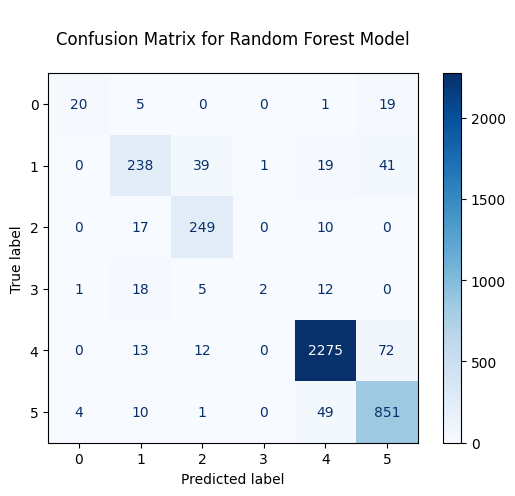

In [105]:
forest = RandomForestClassifier(max_depth= 20, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5, 
                                n_estimators= 500)

forest.fit(X_train_new,y_train)
y_pred = forest.predict(X_val_new)
print(y_pred[:5])

#  Calculate the test accuracy
accuracy = accuracy_score(y_val,y_pred)

# Generate the classification report
classification_report_forest = classification_report(y_val, y_pred)

# Generate the confusion matrix
confusion_matrix_forest = confusion_matrix(y_val, y_pred)

print('Validation Accuracy: {}'.format(accuracy))
print("\nClassification Report:\n", classification_report_forest)
# print("\nConfusion Matrix:\n", confusion_matrix_forest)

# Display the confusion matrix using ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix_forest, display_labels=np.unique(y_val))
display.plot(cmap='Blues')
plt.title('\nConfusion Matrix for Random Forest Model\n')
plt.show()

test_pred_forest = forest.predict(test_data_new)

## *Insights*
## *The parameters of RandomForestClassifier provide flexibility to control the complexity and performance of the model. By adjusting these parameters, we can improve the model's accuracy, reduce overfitting, and optimize the performance of the dataset.*


## Hyperparameter Tuning for XGBoost

## XGBoost (Extreme Gradient Boosting) is a flexible and powerful model and perform well on  variety of tasks due to its ability to handle different types of data. And because of its built-in regularization.
## Hyperparameter tuning e.g., learning rate, number of estimators and max depth can improve performance.

In [106]:
# # Define the model
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',random_state=42)

# # # Define the parameter grid
# param_grid = {
    
#     'n_estimators': [70,80,90,100,125],
#     'max_depth': np.arange(10,13),
#     'learning_rate': [0.01,0.05,0.1],
#     'subsample': [0.7,0.8,0.9],
#     'colsample_bytree': [0.4,0.5,0.6],
#     'gamma': [0.01, 0.1, 0.2],
#     'min_child_weight': [5, 8, 10],
#     'reg_alpha': [0.01, 0.1, 1],
#     'reg_lambda': [0.001, 0.01, 0.1]
# }


# # param_grid = {
# #     'n_estimators': [100, 200, 300],
# #     'learning_rate': [0.01, 0.1, 0.2],
# #     'max_depth': [3, 6, 9],
# #     'min_child_weight': [1, 5, 10],
# #     'gamma': [0, 0.1, 0.2],
# #     'subsample': [0.8, 0.9, 1.0],
# #     'colsample_bytree': [0.8, 0.9, 1.0]
# # }

# # param_grid = {
# #     'n_estimators': [200,225,250,300],
# # #     'learning_rate': [0.001,0.005,0.01,0.05,0.1,0.2],
# #     'max_depth': [9, 10,11,12],
# # #     'min_child_weight': [1, 5, 10],
# #     'gamma': [0.05,0.01,0.08,0.005,0.001],
# # #     'subsample': [0.8, 0.9, 1.0],
# # #     'colsample_bytree': [0.8, 0.9, 1.0]
# # }




# param_grid = { 'n_estimators': [100, 200, 300, 500, 1000],
#               'learning_rate': [0.001,0.005,0.01,0.05,0.02],
#               'subsample': np.arange()
# }






















# random_search_cv = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=50, cv=5, 
#                                    scoring='accuracy', verbose=1, n_jobs=-1)

# grid_search_cv_2 = GridSearchCV(xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# # Fit the random search model
# grid_search_cv_2.fit(X_train_new, y_train)

# # Output the best parameters and score
# xgb_best_params = grid_search_cv_2.best_params_
# xgb_best_score = grid_search_cv_2.best_score_
# print('Best parameters: {}'.format(xgb_best_params))
# print('Best cross-validation score: {}'.format(xgb_best_score))

In [107]:
# print('Best parameters: {}'.format(xgb_best_params))
# print('Best cross-validation score: {}'.format(xgb_best_score))


# Best parameters: {'subsample': 0.6, 'reg_lambda': 0.001, 'reg_alpha': 1, 'n_estimators': 200, 
# 'min_child_weight': 9, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0.0, 'colsample_bytree': 0.5}
# Best cross-validation score: 0.9227174414906039
# [2 5 5 5 5]
# Validation Accuracy: 0.9266666666666666

# Best parameters: {'subsample': 0.8, 'reg_lambda': 0.001, 'reg_alpha': 1, 'n_estimators': 70, 
# 'min_child_weight': 8, 'max_depth': 12, 'learning_rate': 0.1, 'gamma': 0.01, 'colsample_bytree': 0.5}
# Best cross-validation score: 0.9227174414906039
# [2 5 5 5 5]

[4 5 2 4 4]
Validation Accuracy: 0.9244477911646586

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.49      0.59        45
           1       0.76      0.80      0.78       338
           2       0.91      0.91      0.91       276
           3       0.57      0.11      0.18        38
           4       0.97      0.96      0.97      2372
           5       0.87      0.93      0.90       915

    accuracy                           0.92      3984
   macro avg       0.81      0.70      0.72      3984
weighted avg       0.92      0.92      0.92      3984



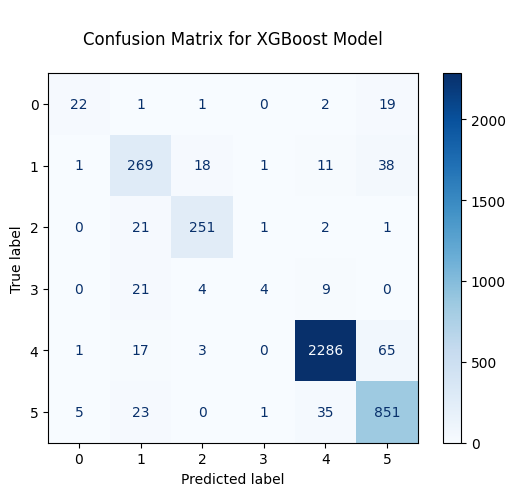

In [108]:
# pipe_1 = Pipeline(steps=[('scaler', StandardScaler()),
#                        ('xgb', XGBClassifier(colsample_bytree = 0.7, gamma = 0.1, learning_rate = 0.01, 
#                          max_depth = 9, min_child_weight = 1, n_estimators = 500, subsample = 0.8))])

# pipe_1 = Pipeline(steps=[('scaler', Standarder()),
#                        ('xgb', XGBClassifier(subsample = 0.7, reg_lambda = 0, reg_alpha = 0.1, n_estimators = 300, 
#                         min_child_weight = 7, max_depth = 6, learning_rate = 0.05, gamScalma = 0.4, colsample_bytree = 0.7))])

# pipe_1 = Pipeline(steps=[('scaler', StandardScaler()),
#                        ('xgb', XGBClassifier(subsample = 0.9999999999999999, reg_lambda = 0.01, reg_alpha = 0, 
#                         n_estimators = 280, min_child_weight = 11, max_depth = 12, learning_rate = 0.1, gamma = 0.8, 
#                         colsample_bytree = 0.5))])



# pipe_1 = Pipeline(steps=[('scaler', StandardScaler()),
#                        ('xgb', XGBClassifier(objective='multi:softmax',num_class=6,n_estimators = 200, min_child_weight = 9, max_depth = 10, learning_rate = 0.1, gamma = 0.01, 
#                         ))])






pipe_1 = Pipeline(steps=[('scaler', StandardScaler()),
                       ('xgb', XGBClassifier(subsample = 0.8, reg_lambda = 0.001, n_estimators = 650, 
                        min_child_weight = 8, max_depth = 12, learning_rate = 0.1, gamma = 0.01, 
                        colsample_bytree = 0.5))])

                         
# pipe_1 = Pipeline(steps=[('scaler', StandardScaler()),
#                        ('xgb', XGBClassifier(learning_rate = 0.01, n_estimators = 650, subsample=0.8,
#                          min_samples_split=2,min_samples_leaf=2,min_weight_fraction_leaf=0.5,loss='softmax',
#                          min_child_weight = 8,max_depth = 12,min_impurity_decrease=0.5,
#                           max_features='sqrt',n_iter_no_change=5, tol=0.001,colsample_bytree=0.5))])

pipe_1.fit(X_train_new,y_train)
                 
y_pred = pipe_1.predict(X_val_new)
print(y_pred[:5])


# Calculate the test accuracy
accuracy = accuracy_score(y_val,y_pred)

# Generate the classification report
classification_report_xgb = classification_report(y_val, y_pred)

# Generate the confusion matrix
confusion_matrix_xgb = confusion_matrix(y_val, y_pred)

print('Validation Accuracy: {}'.format(accuracy))
print("\nClassification Report:\n", classification_report_xgb)

test_pred_xgb_1 = pipe_1.predict(test_data_new)

# Display the confusion matrix using ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix_xgb, display_labels=np.unique(y_val))
display.plot(cmap='Blues')
plt.title('\nConfusion Matrix for XGBoost Model\n')
plt.show()

## *Insights*
## *It is a powerful tool for classification , it combine the strength of gradient boosting with optimization that make it fast and effective. The flexibility of various parameters allow us to fine-tune the modelel.*

In [109]:
X_train_new.head()

,Weapon_Description,Modus_Operandi,Part 1-2,Weapon_Used_Code,Victim_Age,Premise_Code,Status_Description,Premise_Description,Time_Occurred,Longitude,Latitude,Location,Victim_Descent,Reporting_District_no,Victim_Sex,Status,Occurred_Day,Reported_Day
8278,29,2459,-0.845911,0.165459,0.176277,-0.924358,2,186,0.738015,0.984001,0.204709,12294,15,0.025531,0,2,-1.628857,-1.562493
11951,29,5854,-0.845911,0.165459,1.868566,-0.839463,2,162,0.846265,-0.639427,-0.230771,5024,15,-0.468431,2,2,1.390188,0.590997
8311,29,1815,-0.845911,0.165459,1.091028,-0.924358,2,186,0.691622,-1.133219,-0.712973,321,6,0.469764,2,2,0.719289,0.817680
4340,29,209,1.182157,0.165459,-0.509787,0.499991,2,50,-0.499130,0.188715,-0.480247,6451,16,-1.287279,4,2,0.495657,0.477656
2472,29,1338,-0.845911,0.165459,1.228240,-0.834747,1,185,0.598836,-0.705137,1.460020,2373,6,1.404643,0,1,-0.175242,-0.202394


## Hyperparameter Tuning for Logistic Regression

## Logistic Regression is a simple but effective linear model for classification problems, especially when the relationship between the features and the target variable is approximately linear.
## It provides probabilistic outputs and can be regularized to prevent overfitting, making it suitable for high-dimensional datasets.

In [110]:
# # Define the model
# lg_model = LogisticRegression(max_iter=10000,random_state=42)

# # Define the parameter grid
# param_grid = {
#     'penalty': ['l1', 'l2', 'elasticnet'],
# #     'penalty': ['l2'],
#     'C': [0.01, 0.1, 1, 10, 100],
#     'solver': ['liblinear', 'saga']
# }

# # Set up GridSearchCV
# grid_search_cv_3 = GridSearchCV(lg_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# # Fit the model
# grid_search_cv_3.fit(X_train_new, y_train)

# # Get the best parameters and score
# lg_best_params = grid_search_cv_3.best_params_
# lg_best_score = grid_search_cv_3.best_score_
# print('Logistic Regression Best Parameter: {}'.format(lg_best_params))
# print('RLogistic Regression Best Cross-Validation Score: {}'.format(lg_best_score))

In [111]:
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('logistic', LogisticRegression(max_iter=20000, tol=1e-4))  
# ])

# param_grid = {
#     'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],  
#     'logistic__penalty': ['l2'],  
#     'logistic__solver': ['liblinear', 'saga']  
# }

# # Set up GridSearchCV
# grid_search_cv_2 = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search_cv_2.fit(X_train_new, y_train)

# # Get the best parameters and score
# lg_best_params = grid_search_cv_2.best_params_
# lg_best_score = grid_search_cv_2.best_score_
# print('Logistic Regression Best Parameter: {}'.format(lg_best_params))
# print('RLogistic Regression Best Cross-Validation Score: {}'.format(lg_best_score))

In [112]:
# print('Logistic Regression Best Parameter: {}'.format(lg_best_params))
# print('Logistic Regression Best Cross-Validation Score: {}'.format(lg_best_score))

# # Logistic Regression Best Parameter: {'logistic__C': 100, 'logistic__penalty': 'l2', 'logistic__solver': 'saga'}
# # Logistic Regression Best Cross-Validation Score: 0.7994816585225347

[4 5 2 4 4]
Validation Accuracy: 0.8087349397590361

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.16      0.23        45
           1       0.72      0.22      0.34       338
           2       0.55      0.70      0.61       276
           3       0.00      0.00      0.00        38
           4       0.88      0.92      0.90      2372
           5       0.74      0.84      0.79       915

    accuracy                           0.81      3984
   macro avg       0.55      0.47      0.48      3984
weighted avg       0.80      0.81      0.79      3984



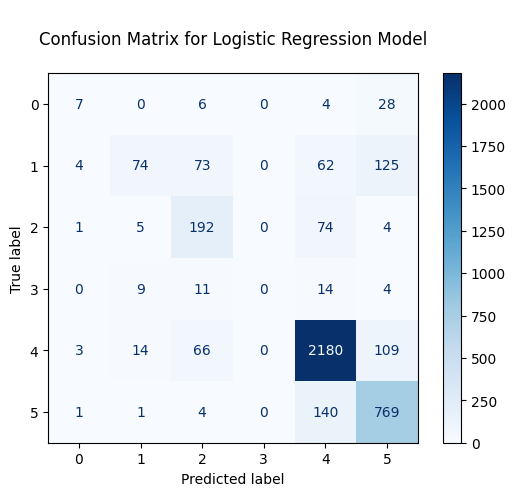

In [113]:
pipe_2 = Pipeline(steps=[('scaler', StandardScaler()),
                       ('logreg', LogisticRegression(C = 100, penalty = 'l2', solver = 'saga', max_iter = 10000, 
                        multi_class = 'multinomial', dual = False, tol = 0.0001))])

pipe_2.fit(X_train_new, y_train)

y_pred = pipe_2.predict(X_val_new)
print(y_pred[:5])

# Calculate the test accuracy
accuracy = accuracy_score(y_val,y_pred)

# Generate the classification report
classification_report_lg = classification_report(y_val, y_pred)

# Generate the confusion matrix
confusion_matrix_lg = confusion_matrix(y_val, y_pred)

print('Validation Accuracy: {}'.format(accuracy))
print("\nClassification Report:\n", classification_report_lg)

test_pred_lg = pipe_2.predict(test_data_new)

# Display the confusion matrix using ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix_lg, display_labels=np.unique(y_val))
display.plot(cmap='Blues')
plt.title('\nConfusion Matrix for Logistic Regression Model\n')
plt.show()

## *Insights*
## *Logistic regression (using the softmax function) is often preferred for its ability to directly model the probabilities of multiple classes.*

In [114]:
# print(pipe_2[-1].coef_.shape)
# print(pipe_2[-1].intercept_.shape)
# print(pipe_2[-1].classes_)

## Gaussian Naive Bayes model

In [115]:
# # Define the model
# naive_bayes_model = GaussianNB()

# param_grid = {
#     'var_smoothing': np.logspace(-9, -6, 10)  
# }

# # Set up GridSearchCV
# grid_search_cv_2 = GridSearchCV(naive_bayes_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1,n_jobs=-1)

# # Fit the model
# grid_search_cv_2.fit(X_train_new, y_train)

# # Get the best parameters and score
# nb_best_params = grid_search_cv_2.best_params_
# nb_best_score = grid_search_cv_2.best_score_
# print('Naive Bayes Best Parameter: {}'.format(nb_best_params))
# print('Naive Bayes Best Cross-Validation Score: {}'.format(nb_best_score))

In [116]:
# print('Naive Bayes Best Parameter: {}'.format(nb_best_params))
# print('Naive Bayes Best Cross-Validation Score: {}'.format(nb_best_score))

# Naive Bayes Best Parameter: {'var_smoothing': 1e-07}
# Naive Bayes Best Cross-Validation Score: 0.7492634824290336

In [117]:
# nb = GaussianNB(var_smoothing = 1e-07)
# nb.fit(X_train_new,y_train)

# y_pred = nb.predict(X_val_new)
# print(y_pred[:5])

# # Calculate the test accuracy
# accuracy = accuracy_score(y_val,y_pred)

# # Generate the classification report
# classification_report_nb = classification_report(y_val, y_pred)

# # Generate the confusion matrix
# confusion_matrix_nb = confusion_matrix(y_val, y_pred)

# print('Validation Accuracy: {}'.format(accuracy))
# print("\nClassification Report:\n", classification_report_nb)

# test_pred_nb = nb.predict(test_data_new)

# # Display the confusion matrix using ConfusionMatrixDisplay
# display = ConfusionMatrixDisplay(confusion_matrix_nb, display_labels=np.unique(y_val))
# display.plot(cmap='Blues')
# plt.title('\nConfusion Matrix for Naive Bayes Model\n')
# plt.show()

## Accuracy: Gives a general idea of each model's performance level. 
## Precision, recall, and F1-score are included in the classification report, which provides additional insights into the performance of the model, especially for datasets that are imbalanced.

## XGBClassifier and RandomForestClassifier models can provide feature importance scores and indicate which features are most influential in making predictions.

## To compare the three models Random Forest, XGBoost, and Logistic Regression after hyperparameter tuning, will use the best cross-validation scores obtained for each model.

In [118]:
# rf_best_params = {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
# rf_best_score = 0.9072303233761279

# xgb_best_params = {'subsample': 0.8, 'reg_lambda': 0.001, 'reg_alpha': 1, 'n_estimators': 70, 
#                    'min_child_weight': 8, 'max_depth': 12, 'learning_rate': 0.1, 'gamma': 0.01, 
#                    'colsample_bytree': 0.5}
# xgb_best_score = 0.9227174414906039

# lg_best_params = {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
# lg_best_score = 0.7994816585225347


In [119]:
# model_comparison = {
#     'Model': ['Random Forest', 'XGBoost', 'Logistic Regression'],
#     'Best Score': [rf_best_score, xgb_best_score, lg_best_score],
#     'Best Parameters': [rf_best_params, xgb_best_params, lg_best_params]
# }

# # Create the DataFrame 

# model_comparison_data_frame = pd.DataFrame(model_comparison)

# # Print the  model comparison DataFrame
# print("Model Comparison:")
# print(model_comparison_data_frame)

# # Determine the best model based on the best score
# best_model_index = model_comparison_data_frame['Best Score'].idxmax()    # idxmax() returns the index for the maximum value in each column.
# print("\nBest_model_index",best_model_index)
# best_model_name = model_comparison_data_frame['Model'][best_model_index]
# best_model_score = model_comparison_data_frame['Best Score'][best_model_index]


# print('\nBest Model: {}'.format(best_model_name))
# print('Best Score: {}'.format(best_model_score))
# print('Best Parameters: {}'.format(model_comparison_data_frame['Best Parameters'][best_model_index]))

## KNN Model

In [120]:
# knn_model = KNeighborsClassifier()

# # Define the parameter grid
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9, 11, 13, 15],  
#     'weights': ['uniform', 'distance'],      
#     'metric': ['euclidean', 'manhattan', 'minkowski'] 
# }

# grid_search_knn = GridSearchCV(knn_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# # Fit the GridSearchCV
# grid_search_knn.fit(X_train_new, y_train)

# # Get the best parameters and best score
# best_params_knn = grid_search_knn.best_params_
# best_score_knn = grid_search_knn.best_score_

# print('Best Parameters for KNN: {}'.format(best_params_knn))
# print('Best Cross-Validation Accuracy for KNN: {}'.format(best_score_knn))

In [121]:
# print('Best Parameters for KNN: {}'.format(best_params_knn))
# print('Best Cross-Validation Accuracy for KNN: {}'.format(best_score_knn))

# Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
# Best Cross-Validation Accuracy for KNN: 0.7776479066041542

In [122]:
# knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 9, weights = 'distance')
# knn.fit(X_train_new,y_train)

# y_pred = knn.predict(X_val_new)
# print(y_pred[:5])

# # Calculate the test accuracy
# accuracy = accuracy_score(y_val,y_pred)

# # Generate the classification report
# classification_report_knn = classification_report(y_val, y_pred)

# # Generate the confusion matrix
# confusion_matrix_knn = confusion_matrix(y_val, y_pred)

# print('Validation Accuracy: {}'.format(accuracy))
# print("\nClassification Report:\n", classification_report_knn)

# test_pred_knn = knn.predict(test_data_new)

# # Display the confusion matrix using ConfusionMatrixDisplay
# display = ConfusionMatrixDisplay(confusion_matrix_knn, display_labels=np.unique(y_val))
# display.plot(cmap='Blues')
# plt.title('\nConfusion Matrix for KNN Model\n')
# plt.show()

## SVM Model

In [123]:
# svm_model = SVC((random_state=42)

# # Define the parameter grid 
# param_grid = {
#     'C': [0.1, 1, 10, 100],  
#     'gamma': [1, 0.1, 0.01, 0.001], 
#     'kernel': ['rbf', 'ploy']  
# }

# grid_search_svm = GridSearchCV(svm_model, param_grid, refit = True, verbose = 3)

# # Fit the GridSearchCV
# grid_search_svm.fit(X_train_new, y_train)

# # Get the best parameters and best score
# best_params_svm = grid_search_svm.best_params_
# best_score_svm = grid_search_svm.best_score_

# print('Best Parameters for SVM: {}'.format(best_params_svm))
# print('Best Cross-Validation Accuracy for SVM: {}'.format(best_score_svm))

In [124]:
# print('Best Parameters for SVM: {}'.format(best_params_svm))
# print('Best Cross-Validation Accuracy for SVM: {}'.format(best_score_svm))

# kernel="poly",random_state=42,gamma=1, C=1.0

In [125]:
# svm = SVC()
# svm.fit(X_train_new,y_train)

# y_pred = svm.predict(X_val_new)
# print(y_pred[:5])

# # Calculate the test accuracy
# accuracy = accuracy_score(y_val,y_pred)

# # Generate the classification report
# classification_report_svm = classification_report(y_val, y_pred)

# # Generate the confusion matrix
# confusion_matrix_svm = confusion_matrix(y_val, y_pred)

# print('Validation Accuracy: {}'.format(accuracy))
# print("\nClassification Report:\n", classification_report_svm)

# test_pred_svm = svm.predict(test_data_new)

# # Display the confusion matrix using ConfusionMatrixDisplay
# display = ConfusionMatrixDisplay(confusion_matrix_svm, display_labels=np.unique(y_val))
# display.plot(cmap='Blues')
# plt.title('\nConfusion Matrix for SVM Model\n')
# plt.show()

## MLP Model (Multi-Layer Perceptron) 

In [126]:
# mlp_model = MLPClassifier(max_iter=10000, random_state=42)

# # Define the parameter grid 
# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100, 50)],  
#     'activation': ['tanh', 'relu'],  
#     'solver': ['adam', 'sgd'], 
#     'alpha': [0.0001, 0.001, 0.01],  
#     'learning_rate': ['constant', 'adaptive']  
# }

# # Set up GridSearchCV
# grid_search_mlp = GridSearchCV(mlp_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# # Fit the GridSearchCV
# grid_search_mlp.fit(X_train_new, y_train)

# # Get the best parameters and best score
# best_params_mlp = grid_search_mlp.best_params_
# best_score_mlp = grid_search_mlp.best_score_

# print('Best Parameters for MLP: {}'.format(best_params_mlp))
# print('Best Cross-Validation Accuracy for MLP: {}'.format(best_score_mlp))

In [127]:
# print('Best Parameters for MLP: {}'.format(best_params_mlp))
# print('Best Cross-Validation Accuracy for MLP: {}'.format(best_score_mlp))

# Best Parameters for MLP: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
# Best Cross-Validation Accuracy for MLP: 0.7642922779600693

In [128]:
# mlp = MLPClassifier(activation = 'logistic', alpha = 0.001, hidden_layer_sizes= (100, 100, 50), learning_rate = 'constant', solver = 'adam')
# mlp.fit(X_train_new,y_train)

# y_pred = mlp.predict(X_val_new)
# print(y_pred[:5])

# # Calculate the test accuracy
# accuracy = accuracy_score(y_val,y_pred)

# # Generate the classification report
# classification_report_mlp = classification_report(y_val, y_pred)

# # Generate the confusion matrix
# confusion_matrix_mlp = confusion_matrix(y_val, y_pred)

# print('Validation Accuracy: {}'.format(accuracy))
# print("\nClassification Report:\n", classification_report_mlp)

# test_pred_mlp = mlp.predict(test_data_new)

# # Display the confusion matrix using ConfusionMatrixDisplay
# display = ConfusionMatrixDisplay(confusion_matrix_mlp, display_labels=np.unique(y_val))
# display.plot(cmap='Blues')
# plt.title('\nConfusion Matrix for MLP Model\n')
# plt.show()

## Function to Plot Learning Curves

In [129]:
# def plot_learning_curve(estimator, title, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
#     plt.figure()
#     plt.title(title)
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
    
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
#     )
    
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
    
#     plt.grid()
    
#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#              label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
#              label="Cross-validation score")
    
#     plt.legend(loc="best")
#     return plt

## Plotting Learning Curves for Each Model
##  1. Random Forest Classifier

In [130]:
# plot_learning_curve(forest, "Learning Curves (Random Forest)", X_train_new, y_train)
# plt.show()

## 2. XGBoost Classifier

In [131]:
# plot_learning_curve(pipe_1, "Learning Curves (XGBoost)", X_train_new, y_train)
# plt.show()

## 3. Logistic Regression:

In [132]:
# plot_learning_curve(pipe_2, "Learning Curves (Logistic Regression)", X_train_new, y_train)
# plt.show()

In [133]:
# best_model=classifier

In [134]:
# test_pred=best_model.predict(test_data)

In [135]:
test_pred_decode = label_encoder_crime.inverse_transform(test_pred_xgb_1)
test_pred_decode



array(['Violent Crimes', 'Property Crimes',
       'Fraud and White-Collar Crimes', ..., 'Violent Crimes',
       'Violent Crimes', 'Property Crimes'], dtype=object)

In [136]:
sample=pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv")

In [137]:
sample.shape

(1000, 3)

In [138]:
sample.head()

,ID,Crime_Category,Unnamed: 2
0,1,Crimes against Persons,NaN
1,2,Crimes against Public Order,NaN
2,3,Other Crimes,NaN
3,4,Crimes against Public Order,NaN
4,5,Other Crimes,NaN


In [139]:
test_data.shape

(5000, 25)

In [140]:
submission=pd.DataFrame({"ID": np.arange(1,5001),
                         "Crime_Category": test_pred_decode})
print(submission.head())
submission.to_csv('submission.csv',index=False)

   ID                 Crime_Category
0   1                 Violent Crimes
1   2                Property Crimes
2   3  Fraud and White-Collar Crimes
3   4                Property Crimes
4   5    Crimes against Public Order
